In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-10-26 16:20:42--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  5.93MB/s    in 0.8s    

2023-10-26 16:20:43 (5.93 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.5 MB/s eta 0:00:00


In [3]:
from transformers import pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import textwrap

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [4]:
clf = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
clf(
    "This is a great movie",
    candidate_labels=["positive", "negative"]
)


{'sequence': 'This is a great movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9969461560249329, 0.0030538293067365885]}

In [6]:
# https://en.wikipedia.org/wiki/AMP-activated_protein_kinase
text = \
"Due to the presence of isoforms of its components, there are 12 versions " + \
"of AMPK in mammals, each of which can have different tissue " + \
"localizations, and different functions under different conditions. " + \
"AMPK is regulated allosterically and by post-translational " + \
"modification, which work together."
clf(
    text,
    candidate_labels=["biology", "math", "geology"]
)

{'sequence': 'Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can have different tissue localizations, and different functions under different conditions. AMPK is regulated allosterically and by post-translational modification, which work together.',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.8908604383468628, 0.06606573611497879, 0.0430738590657711]}

In [7]:
df = pd.read_csv("bbc_text_cls.csv")

In [8]:
len(df)

2225

In [9]:
df.sample(frac=1).head()

,text,labels
1140,Army chiefs in regiments decision\n\nMilitary ...,politics
2026,Gangsters dominate gaming chart\n\nVideo games...,tech
756,Spears seeks aborted tour payment\n\nSinger Br...,entertainment
1225,Manchester wins Labour conference\n\nThe Labou...,politics
1208,Parties warned over 'grey vote'\n\nPolitical p...,politics


In [10]:
labels = list(set(df.labels))
labels

['politics', 'sport', 'tech', 'business', 'entertainment']

In [11]:
print(textwrap.fill(df.iloc[1024]['text']))

UK troops on Ivory Coast standby  Downing Street has confirmed British
troops are on standby in case they need to help evacuate several
hundred UK citizens from Ivory Coast.  The news came as it emerged
France had begun evacuating its hostages after days of anti-French
demonstrations. Trouble flared after nine French peacekeepers were
killed and President Jacques Chirac ordered the destruction of the
Ivory Coast's air force. A company of 100-120 UK troops is understood
to have been put on standby. They are ready to fly out and secure the
route from the embassy to the airport if called upon. Prime Minister
Tony Blair's official spokesman said: "There are British nationals in
Ivory Coast and as you can imagine we are making the usual contingency
plans in case the situation deteriorates further, but that's all I can
say at this stage."  He added the situation would be monitored
carefully in case evacuation became necessary. France has played a
lead role in international peacekeeping in Iv

In [12]:
df.iloc[1024]['labels']

'politics'

In [13]:
clf(df.iloc[1024]['text'], candidate_labels=labels)

{'sequence': 'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in internati

In [15]:
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [18]:
df_ = df[:100]

In [19]:
preds = clf(df_.text.tolist(), candidate_labels=labels)

In [20]:
predicted_labels = [d['labels'][0] for d in preds]

In [21]:
df_['predicted_labels'] = predicted_labels

<ipython-input-21-b4a52528a5d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['predicted_labels'] = predicted_labels


In [22]:
print("Acc.:", np.mean(df_['predicted_labels'] == df_['labels']))

Acc.: 0.76


In [23]:
# Convert predicion probs into an NxK matrix according to
# original label order

N = len(df_)
K = len(labels)
label2idx = {v:k for k,v in enumerate(labels)}

probs = np.zeros((N, K))
for i in range(N):
    # loop through labels and scores in corresponding order
    d = preds[i]
    for label, score in zip(d['labels'], d['scores']):
        k = label2idx[label]
        probs[i, k] = score


In [24]:
int_labels = [label2idx[x] for x in df_['labels']]

In [25]:
int_preds = np.argmax(probs, axis=1)
cm = confusion_matrix(int_labels, int_preds, normalize='true')


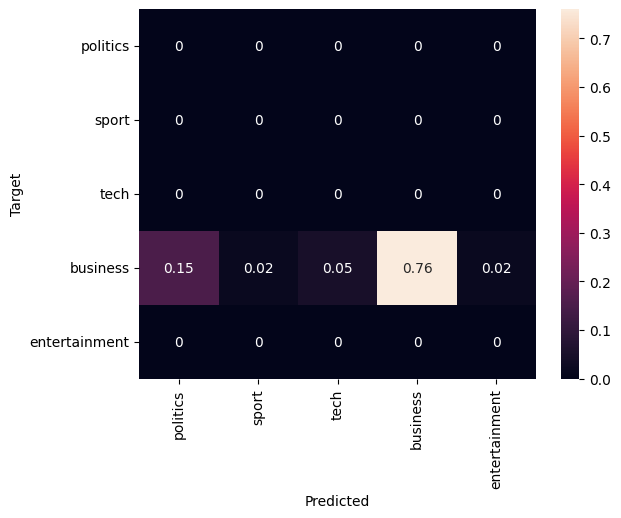

In [26]:
# Scikit-Learn is transitioning to V1, but ut's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    ax = sb.heatmap(df_cm, annot=True, fmt='.2g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')

plot_cm(cm)

In [27]:
f1_score(df_['labels'], predicted_labels, average='micro')

0.76

In [28]:
roc_auc_score(int_labels, probs, multi_class='ovo')

ValueError: ignored